# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [96]:
df = pd.read_excel('geo.xlsx')

In [97]:
df.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [98]:
df = df[['x','y','comment_class']]

In [99]:
scaler = StandardScaler()

In [100]:
df_scaler = pd.DataFrame(scaler.fit_transform(df))
df_scaler.columns = df.columns

In [101]:
df_scaler.head()

,x,y,comment_class
0,0.367919,0.159553,-0.378889
1,0.367919,0.159553,-0.378889
2,0.293178,-0.348131,-0.378889
3,-0.073819,-0.539880,-0.378889
4,-0.009022,-0.496273,-0.378889


In [102]:
kmeans = KMeans(n_clusters=4).fit(df_scaler[['x','y']])
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.43817267 -1.48130872]
 [ 1.32284002  0.03481608]
 [-1.11275896  1.41924172]
 [-0.2353502   0.02454453]]


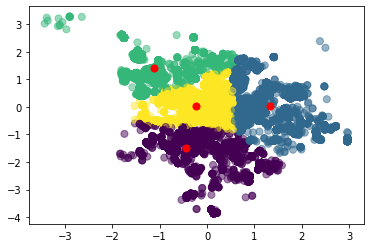

In [103]:
plt.scatter(df_scaler['x'], df_scaler['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [47]:
#https://datatofish.com/k-means-clustering-python/

In [104]:
kmeans = KMeans(n_clusters=4).fit(df_scaler)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.85908771 -0.08437183 -0.37888892]
 [-0.57093622 -1.2475812  -0.37876473]
 [ 0.35899456  0.24335735  2.63929599]
 [-0.93190128  1.05379086 -0.37847223]]


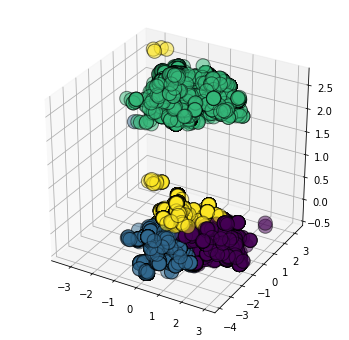

In [105]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_scaler.x, df_scaler.y, df_scaler.comment_class,
           linewidths=1, alpha=.5,
           edgecolor='k',
           s = 200,
           c=kmeans.labels_.astype(float))
plt.show()

In [106]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit(df_scaler)
    k_inertia.append(clf_kmeans.inertia_)

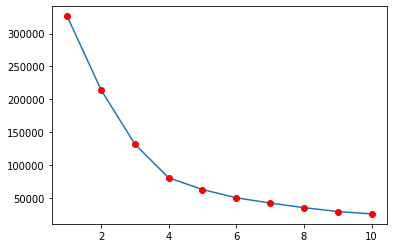

In [107]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [108]:
diff = np.diff(k_inertia)

In [109]:
diff_r = diff[1:] / diff[:-1]

In [110]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

4